In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
names_df = pd.read_csv('D:/Actor_Network/data/name.basics.tsv/data.tsv',sep='\t')

In [3]:
names_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0078723,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0083922,tt0050976,tt0050986"
...,...,...,...,...,...,...
11924217,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt11657662,tt2455546"
11924218,nm9993716,Essias Loberg,\N,\N,NaN,\N
11924219,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11924220,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [4]:
titles_df=pd.read_csv('D:/Actor_Network/data/title.basics.tsv/data.tsv',sep='\t')

C:\Users\prade\AppData\Local\Temp\ipykernel_12872\1820054059.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles_df=pd.read_csv('D:/Actor_Network/data/title.basics.tsv/data.tsv',sep='\t')


In [5]:
titles_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9223785,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9223786,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9223787,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9223788,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [6]:
top_actors_df=pd.read_csv('D:/Actor_Network/data/top_actor.csv')

In [7]:
top_actors_df

,Actor
0,Akshay Kumar
1,Ranveer Singh
2,Salman Khan
3,Prabhas
4,Sanjay Dutt
...,...
95,Tahir Raj Bhasin
96,Sooraj Pancholi
97,Jackie Shroff
98,Neil Bhoopalam


In [8]:
actors_df=names_df[(names_df['primaryProfession'].str.contains('actor')|
                  names_df['primaryProfession'].str.contains('actress'))&
                  names_df['knownForTitles'].str.contains('tt')].reset_index(drop=True)

In [9]:
top_actors = top_actors_df['Actor'].tolist()

In [10]:
actors_df = actors_df[actors_df['primaryName'].isin(top_actors)]

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
actors_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
723,nm0000821,Amitabh Bachchan,1942,\N,"actor,producer,writer","tt0337578,tt5571734,tt0375611,tt0213890"
2594,nm0004335,Hrithik Roshan,1974,\N,"actor,assistant_director,music_department","tt1562872,tt0254481,tt0441048,tt0449994"
2638,nm0004429,Dharmendra,1935,\N,"actor,producer,miscellaneous","tt0099652,tt0073707,tt0233147,tt0070935"
2694,nm0004569,Sanjay Dutt,1959,\N,"actor,music_department,soundtrack","tt0374887,tt0456144,tt0294662,tt1849718"
3813,nm0006763,Jackie Shroff,1957,\N,"actor,producer,soundtrack","tt0102636,tt0248185,tt9095260,tt0238936"
3825,nm0006795,Salman Khan,1965,\N,"producer,actor,soundtrack","tt4832640,tt3863552,tt2016894,tt1729637"
3944,nm0007113,Nana Patekar,1951,\N,"actor,music_department,director","tt0476884,tt0110280,tt0451631,tt0102701"
4005,nm0007228,Fardeen Khan,1972,\N,"actor,soundtrack","tt0281102,tt0210920,tt0422236,tt0451833"
4988,nm0008944,John Abraham,\N,\N,actor,tt0117802
4989,nm0008945,John Abraham,\N,\N,actor,tt0005935


In [13]:
actors_df = actors_df[actors_df['birthYear']!='\\N']

In [14]:
actors_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
723,nm0000821,Amitabh Bachchan,1942,\N,"actor,producer,writer","tt0337578,tt5571734,tt0375611,tt0213890"
2594,nm0004335,Hrithik Roshan,1974,\N,"actor,assistant_director,music_department","tt1562872,tt0254481,tt0441048,tt0449994"
2638,nm0004429,Dharmendra,1935,\N,"actor,producer,miscellaneous","tt0099652,tt0073707,tt0233147,tt0070935"
2694,nm0004569,Sanjay Dutt,1959,\N,"actor,music_department,soundtrack","tt0374887,tt0456144,tt0294662,tt1849718"
3813,nm0006763,Jackie Shroff,1957,\N,"actor,producer,soundtrack","tt0102636,tt0248185,tt9095260,tt0238936"
3825,nm0006795,Salman Khan,1965,\N,"producer,actor,soundtrack","tt4832640,tt3863552,tt2016894,tt1729637"
3944,nm0007113,Nana Patekar,1951,\N,"actor,music_department,director","tt0476884,tt0110280,tt0451631,tt0102701"
4005,nm0007228,Fardeen Khan,1972,\N,"actor,soundtrack","tt0281102,tt0210920,tt0422236,tt0451833"
7022,nm0012778,Aftab Shivdasani,1978,\N,"actor,writer,producer","tt0319020,tt1024943,tt0214931,tt0406977"
25234,nm0045393,Abhishek Bachchan,1976,\N,"actor,music_department,soundtrack","tt1185420,tt0432047,tt0499375,tt2461132"


In [15]:
name_duplicates_df = actors_df[actors_df.duplicated('primaryName')]['primaryName'].unique().tolist()

In [16]:
name_duplicates_df

['Sunny Deol', 'Mithun Chakraborty', 'Rishi Kapoor', 'Siddharth']

In [17]:
filtered_name_duplicates = ['nm0219971', #Sunny Deol
                            'nm0149822', #Mithun Chakraborty
                            'nm0438501', #Rishi Kapoor
                            'nm1413459', #Siddharth 
                           ]
filtered_name_duplicates_df = actors_df[actors_df['nconst'].isin(filtered_name_duplicates)]

In [18]:
filtered_name_duplicates_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
81469,nm0149822,Mithun Chakraborty,1950,\N,"actor,music_department,writer","tt0499375,tt8108268,tt0454314,tt2283748"
119839,nm0219971,Sunny Deol,1956,\N,"actor,producer,director","tt0284137,tt0118751,tt0099652,tt0109555"
234713,nm0438501,Rishi Kapoor,1952,2020,"actor,soundtrack,music_department","tt1849718,tt4900716,tt1275863,tt0886539"
1394515,nm1413459,Siddharth,1979,\N,"actor,music_department,soundtrack","tt0405508,tt2624704,tt0455663,tt3569782"


In [19]:
actors_df = actors_df.drop_duplicates ('primaryName', keep=False) 
actors_df = pd.concat([actors_df, filtered_name_duplicates_df])\
.reset_index(drop=True) 

In [20]:
actors_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000821,Amitabh Bachchan,1942,\N,"actor,producer,writer","tt0337578,tt5571734,tt0375611,tt0213890"
1,nm0004335,Hrithik Roshan,1974,\N,"actor,assistant_director,music_department","tt1562872,tt0254481,tt0441048,tt0449994"
2,nm0004429,Dharmendra,1935,\N,"actor,producer,miscellaneous","tt0099652,tt0073707,tt0233147,tt0070935"
3,nm0004569,Sanjay Dutt,1959,\N,"actor,music_department,soundtrack","tt0374887,tt0456144,tt0294662,tt1849718"
4,nm0006763,Jackie Shroff,1957,\N,"actor,producer,soundtrack","tt0102636,tt0248185,tt9095260,tt0238936"
5,nm0006795,Salman Khan,1965,\N,"producer,actor,soundtrack","tt4832640,tt3863552,tt2016894,tt1729637"
6,nm0007113,Nana Patekar,1951,\N,"actor,music_department,director","tt0476884,tt0110280,tt0451631,tt0102701"
7,nm0007228,Fardeen Khan,1972,\N,"actor,soundtrack","tt0281102,tt0210920,tt0422236,tt0451833"
8,nm0012778,Aftab Shivdasani,1978,\N,"actor,writer,producer","tt0319020,tt1024943,tt0214931,tt0406977"
9,nm0045393,Abhishek Bachchan,1976,\N,"actor,music_department,soundtrack","tt1185420,tt0432047,tt0499375,tt2461132"


In [21]:
for actor in top_actors: 
    if actor not in actors_df['primaryName'].unique().tolist():
        print(actor)

Ram Charan
Jr NTR
R Madhavan
Sunny Singh Nijjar
Kunal Kemmu
Aditya Roy Kapur
Pulkit Samrat
Ishaan Khatter
Vir Das
Parambrata Chatterjee
Jimmy Sheirgill
Prabhu Dheva
Ashish Chowdhry
Himansh Kohli
Devanshu Sharma
Girish Taurani
Sooraj Pancholi


In [22]:
missing_names = ['nm2776304', #Ram Charan
                 'nm1694524', #Jr NTR
                 'rm0534856', #R Madhavan 
                 'nm2194798', #Sunny Singh Nijjar
                 'nm0447240', #Kunal Kemmu
                 'nm3169069', #Aditya Roy Kapur
                 'rm4992002', #Pulkit Samrat 
                 'nm2020109', #Ishaan Khatter
                 'nm1983888', #Vir Das
                 'nm1913625', #Parambrata Chatterjee
                 'rm0792116', #Jimmy Sheirgill 
                 'nm0222150', #Prabhu Dheva
                 'nm0996627', #Ashish Chowdhry
                 'nm4946996', #Himansh Kohli
                 'rm5240573', #Girish Taurani 
                 'nm4808460', #Sooraj Pancholi
                ]

In [23]:
missing_names_df = names_df[names_df['nconst'].isin(missing_names)] 
actors_df = pd.concat([actors_df, missing_names_df])\
           .reset_index(drop=True) #Combine actors_df with top actors that were not in actors_df

In [24]:
actors_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000821,Amitabh Bachchan,1942,\N,"actor,producer,writer","tt0337578,tt5571734,tt0375611,tt0213890"
1,nm0004335,Hrithik Roshan,1974,\N,"actor,assistant_director,music_department","tt1562872,tt0254481,tt0441048,tt0449994"
2,nm0004429,Dharmendra,1935,\N,"actor,producer,miscellaneous","tt0099652,tt0073707,tt0233147,tt0070935"
3,nm0004569,Sanjay Dutt,1959,\N,"actor,music_department,soundtrack","tt0374887,tt0456144,tt0294662,tt1849718"
4,nm0006763,Jackie Shroff,1957,\N,"actor,producer,soundtrack","tt0102636,tt0248185,tt9095260,tt0238936"
5,nm0006795,Salman Khan,1965,\N,"producer,actor,soundtrack","tt4832640,tt3863552,tt2016894,tt1729637"
6,nm0007113,Nana Patekar,1951,\N,"actor,music_department,director","tt0476884,tt0110280,tt0451631,tt0102701"
7,nm0007228,Fardeen Khan,1972,\N,"actor,soundtrack","tt0281102,tt0210920,tt0422236,tt0451833"
8,nm0012778,Aftab Shivdasani,1978,\N,"actor,writer,producer","tt0319020,tt1024943,tt0214931,tt0406977"
9,nm0045393,Abhishek Bachchan,1976,\N,"actor,music_department,soundtrack","tt1185420,tt0432047,tt0499375,tt2461132"


In [25]:
actors_df.to_csv('D:/Actor_Network/data/filename.tsv', index = False, encoding='utf-8',sep='\t')

In [26]:
titles_df = titles_df[titles_df['titleType']=='movie']

In [27]:
name_IDs = actors_df['nconst'].tolist() 

In [32]:
name_IDs = actors_df['nconst'].tolist() 
names = actors_df['primaryName'].tolist() 
ID_name_dict = dict(zip(name_IDs, names))

In [33]:
ID_name_dict

{'nm0000821': 'Amitabh Bachchan',
 'nm0004335': 'Hrithik Roshan',
 'nm0004429': 'Dharmendra',
 'nm0004569': 'Sanjay Dutt',
 'nm0006763': 'Jackie Shroff',
 'nm0006795': 'Salman Khan',
 'nm0007113': 'Nana Patekar',
 'nm0007228': 'Fardeen Khan',
 'nm0012778': 'Aftab Shivdasani',
 'nm0045393': 'Abhishek Bachchan',
 'nm0048075': 'Manoj Bajpayee',
 'nm0159167': 'Uday Chopra',
 'nm0196375': 'Parvin Dabas',
 'nm0219967': 'Bobby Deol',
 'nm0222426': 'Ajay Devgn',
 'nm0332871': 'Govinda',
 'nm0393535': 'Randeep Hooda',
 'nm0412917': 'Jaaved Jaaferi',
 'nm0430817': 'Sharman Joshi',
 'nm0438463': 'Anil Kapoor',
 'nm0451148': 'Aamir Khan',
 'nm0451174': 'Arshad Warsi',
 'nm0451234': 'Irrfan Khan',
 'nm0451307': 'Saif Ali Khan',
 'nm0451321': 'Shah Rukh Khan',
 'nm0451379': 'Akshaye Khanna',
 'nm0451600': 'Anupam Kher',
 'nm0457410': 'Ravi Kishan',
 'nm0474774': 'Akshay Kumar',
 'nm0707425': 'Rajinikanth',
 'nm0712546': 'Paresh Rawal',
 'nm0787462': 'Naseeruddin Shah',
 'nm0792911': 'Suniel Shetty',

In [34]:
title_IDs = titles_df['tconst'].tolist()
titles = titles_df['primaryTitle'].tolist() 
ID_title_dict = dict(zip(title_IDs, titles))

In [35]:
titles

['Miss Jerry',
 'Bohemios',
 'The Story of the Kelly Gang',
 'The Prodigal Son',
 'Robbery Under Arms',
 'Hamlet',
 'Don Quijote',
 'The Fairylogue and Radio-Plays',
 'Andreas Hofer',
 'La bocana de Mar Chica',
 'A Cultura do Cacau',
 'De Garraf a Barcelona',
 'Un día en Xochimilco',
 'Los dos hermanos',
 'Fabricación del corcho en Sant Feliu de Guixols',
 'Faldgruben',
 'Fiesta de toros',
 'Fiestas de Santa Lucía - Belenes',
 'Fiestas en La Garriga',
 'Gira política de Madero y Pino Suárez',
 'Hamlet, Prince of Denmark',
 'Locura de amor',
 'Lægens offer',
 'Melilla y el Gurugu',
 'Niños en la alameda',
 'La primera y segunda casetas',
 'Protección de un convoy de víveres en el puente de camellos',
 'Salome Mad',
 'Sherlock Holmes VI',
 "Smith's Knockabout Theatre",
 'Gøngehøvdingen',
 'El sueño milagroso',
 'O Terremoto de Benavente',
 'Toma del Gurugu',
 'Two of the Boys',
 'La vida en el campamento',
 'Viernes de dolores',
 "Abraham Lincoln's Clemency",
 "L'aluminite",
 'Amleto',
 

In [36]:
ID_title_dict

{'tt0000009': 'Miss Jerry',
 'tt0000502': 'Bohemios',
 'tt0000574': 'The Story of the Kelly Gang',
 'tt0000591': 'The Prodigal Son',
 'tt0000615': 'Robbery Under Arms',
 'tt0000630': 'Hamlet',
 'tt0000675': 'Don Quijote',
 'tt0000679': 'The Fairylogue and Radio-Plays',
 'tt0000793': 'Andreas Hofer',
 'tt0000814': 'La bocana de Mar Chica',
 'tt0000838': 'A Cultura do Cacau',
 'tt0000842': 'De Garraf a Barcelona',
 'tt0000846': 'Un día en Xochimilco',
 'tt0000850': 'Los dos hermanos',
 'tt0000859': 'Fabricación del corcho en Sant Feliu de Guixols',
 'tt0000862': 'Faldgruben',
 'tt0000867': 'Fiesta de toros',
 'tt0000868': 'Fiestas de Santa Lucía - Belenes',
 'tt0000869': 'Fiestas en La Garriga',
 'tt0000879': 'Gira política de Madero y Pino Suárez',
 'tt0000886': 'Hamlet, Prince of Denmark',
 'tt0000941': 'Locura de amor',
 'tt0000947': 'Lægens offer',
 'tt0000959': 'Melilla y el Gurugu',
 'tt0000984': 'Niños en la alameda',
 'tt0001007': 'La primera y segunda casetas',
 'tt0001010': 'Pr

In [37]:
g = nx.Graph()
edge_attribute_dict = {}

In [38]:
#Add nodes and edges to network graph, and store weights in dictionary 
for name_ID, titles in name_title_dict.items():
    g.add_node(name_ID)
    for title in titles: #Iterate through list of titles 
        if title in title_IDs: #Check if title is for a movie 
            for name_ID2, titles2 in name_title_dict.items(): 
                if (title in titles2) and (titles2 != titles):
                    g.add_edge(name_ID, name_ID2)
                    name_ID_tuple = tuple(sorted((name_ID, name_ID2))) 
                    if name_ID_tuple not in edge_attribute_dict:
                        edge_attribute_dict[name_ID_tuple] = 1 
                    else:
                        edge_attribute_dict[name_ID_tuple] += 1

In [39]:
# Convert values into network graph weights
for k, v in edge_attribute_dict.items():
    edge_attribute_dict[k] = {'weight':v}
    
# Set weights to graph 
nx.set_edge_attributes(g, edge_attribute_dict)

In [40]:
#Degree centrality 
centrality = nx.degree_centrality (g) 
[(ID_name_dict[x], centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)[:10]]

[('Boman Irani', 0.06382978723404255),
 ('Farhan Akhtar', 0.05319148936170213),
 ('Sharman Joshi', 0.05319148936170213),
 ('Suniel Shetty', 0.05319148936170213),
 ('Aftab Shivdasani', 0.0425531914893617),
 ('Paresh Rawal', 0.0425531914893617),
 ('Shreyas Talpade', 0.0425531914893617),
 ('Ajay Devgn', 0.0425531914893617),
 ('Aamir Khan', 0.0425531914893617),
 ('Akshaye Khanna', 0.0425531914893617)]

In [41]:
labels = {}    
for x in sorted(centrality, key=centrality.get, reverse=True)[:10]:
        #set the node name as the key and the label as its value 
        labels[x] = ID_name_dict[x]

In [42]:
[(ID_name_dict[x], [ID_title_dict[title] for title in name_title_dict[x]\
 if title in ID_title_dict]) for x in sorted (centrality, key=centrality.get, reverse=True)[:10]]

[('Boman Irani',
  ['Don 2', '3 Idiots', 'Carry On, Munna Bhai', 'Munna Bhai M.B.B.S.']),
 ('Farhan Akhtar',
  ['Zindagi Na Milegi Dobara', 'Don', 'Bhaag Milkha Bhaag', 'Dil Chahta Hai']),
 ('Sharman Joshi',
  ['Golmaal: Fun Unlimited',
   'Color It Yellow',
   '3 Idiots',
   'Life in a Metro']),
 ('Suniel Shetty', ['Hera Pheri', 'Border', 'Main Hoon Na', 'Dhadkan']),
 ('Aftab Shivdasani',
  ['Awara Paagal Deewana', 'Om Shanti Om', 'Mast', 'Masti']),
 ('Paresh Rawal',
  ['OMG: Oh My God!', 'Awara Paagal Deewana', 'Hera Pheri', 'Hungama']),
 ('Shreyas Talpade', ['Dor', 'Golmaal Returns', 'Iqbal', 'Om Shanti Om']),
 ('Ajay Devgn',
  ['Once Upon a Time in Mumbaai', 'Drishyam', 'Shivaay', 'Company']),
 ('Aamir Khan',
  ['Dangal',
   'Like Stars on Earth',
   'Lagaan: Once Upon a Time in India',
   '3 Idiots']),
 ('Akshaye Khanna', ['Race', 'Border', 'Dil Chahta Hai', 'Humraaz'])]

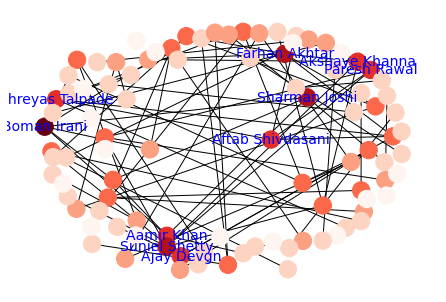

<Figure size 432x288 with 0 Axes>

In [43]:
# Create and show network graph
pos = nx.spring_layout(g, k=1, iterations=20)
max_c = max(centrality.values())
color_map = {x[0]:x[1]/max_c for x in centrality.items() }
nx.draw(g, pos, node_color=list(color_map.values()), cmap=plt.cm.Reds) 
nx.draw_networkx_labels(g,pos,labels,font_size=14,font_color='Blue')
plt.show()

In [44]:
# Closeness centrality
centrality = nx.closeness_centrality (g, distance='weight')
[(ID_name_dict[x], centrality[x]) for x in sorted (centrality, key=centrality.get, reverse=True) [:10]]

[('Shreyas Talpade', 0.055625086914198305),
 ('Aftab Shivdasani', 0.05319148936170213),
 ('Arjun Rampal', 0.05319148936170213),
 ('Tusshar Kapoor', 0.05319148936170213),
 ('Sharman Joshi', 0.05035880649628604),
 ('Farhan Akhtar', 0.04948045522018803),
 ('Paresh Rawal', 0.047812574707147976),
 ('Boman Irani', 0.04600345025876941),
 ('Akshaye Khanna', 0.04479283314669653),
 ('Suniel Shetty', 0.04479283314669653)]

In [45]:
[(ID_name_dict[x], [ID_title_dict[title] for title in name_title_dict[x]\
if title in ID_title_dict]) for x in sorted (centrality, key=centrality.get, reverse=True) [:10]]

[('Shreyas Talpade', ['Dor', 'Golmaal Returns', 'Iqbal', 'Om Shanti Om']),
 ('Aftab Shivdasani',
  ['Awara Paagal Deewana', 'Om Shanti Om', 'Mast', 'Masti']),
 ('Arjun Rampal', ['Om Shanti Om', 'Rock On!!', 'Ra.One', 'Don']),
 ('Tusshar Kapoor',
  ['Golmaal: Fun Unlimited', 'Laxmii', 'Khakee', 'Golmaal Returns']),
 ('Sharman Joshi',
  ['Golmaal: Fun Unlimited',
   'Color It Yellow',
   '3 Idiots',
   'Life in a Metro']),
 ('Farhan Akhtar',
  ['Zindagi Na Milegi Dobara', 'Don', 'Bhaag Milkha Bhaag', 'Dil Chahta Hai']),
 ('Paresh Rawal',
  ['OMG: Oh My God!', 'Awara Paagal Deewana', 'Hera Pheri', 'Hungama']),
 ('Boman Irani',
  ['Don 2', '3 Idiots', 'Carry On, Munna Bhai', 'Munna Bhai M.B.B.S.']),
 ('Akshaye Khanna', ['Race', 'Border', 'Dil Chahta Hai', 'Humraaz']),
 ('Suniel Shetty', ['Hera Pheri', 'Border', 'Main Hoon Na', 'Dhadkan'])]

In [46]:
labels = {}    
for x in sorted(centrality, key=centrality.get, reverse=True)[:10]:
        #set the node name as the key and the label as its value 
        labels[x] = ID_name_dict[x]

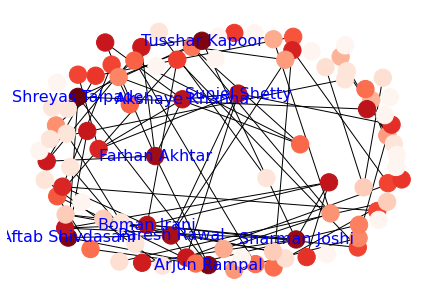

<Figure size 432x288 with 0 Axes>

In [47]:
# Create and show network graph
pos = nx.spring_layout(g, k=1, iterations=20)
max_c = max(centrality.values())
color_map = {x[0]: x[1]/max_c for x in centrality.items() }
nx.draw(g, pos, node_color=list(color_map.values()), cmap=plt.cm.Reds)
nx.draw_networkx_labels(g,pos,labels,font_size=16,font_color='Blue')
plt.show()

In [48]:
# Betweenness centrality
centrality = nx.betweenness_centrality(g)
[(ID_name_dict[x], centrality[x]) for x in sorted (centrality, key=centrality.get, reverse=True) [:10]]

[('Shreyas Talpade', 0.0944863875543354),
 ('Sharman Joshi', 0.0889956531686113),
 ('Tusshar Kapoor', 0.08785175017158545),
 ('Boman Irani', 0.07412491420727522),
 ('Farhan Akhtar', 0.06154198123999085),
 ('Aftab Shivdasani', 0.052047586364676275),
 ('Arjun Rampal', 0.049759780370624576),
 ('Paresh Rawal', 0.04781514527568063),
 ('Sanjay Dutt', 0.032944406314344546),
 ('Suniel Shetty', 0.0271105010295127)]

In [49]:
labels = {}    
for x in sorted(centrality, key=centrality.get, reverse=True)[:10]:
        #set the node name as the key and the label as its value 
        labels[x] = ID_name_dict[x]

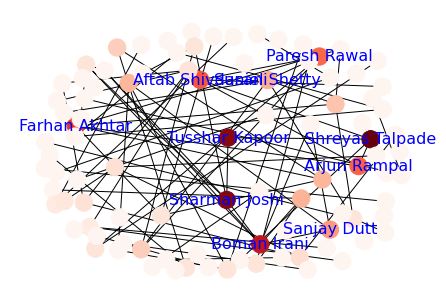

<Figure size 432x288 with 0 Axes>

In [52]:
# Create and show network graph
pos = nx.spring_layout(g, k=1, iterations=20)
max_c = max(centrality.values())
color_map = {x[0]:x[1]/max_c for x in centrality. items() } 
nx.draw(g, pos, node_color=list(color_map.values()), cmap=plt.cm.Reds) 
nx.draw_networkx_labels(g,pos,labels,font_size=16,font_color='Blue')
plt.show()